In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import multinomial

In [ ]:
df = pd.read_csv("heart_disease_health_indicators_BRFSS2015.csv")
df

HeartDiseaseorAttack  HighBP  HighChol  CholCheck   BMI  Smoker  \
0                        0.0     1.0       1.0        1.0  40.0     1.0   
1                        0.0     0.0       0.0        0.0  25.0     1.0   
2                        0.0     1.0       1.0        1.0  28.0     0.0   
3                        0.0     1.0       0.0        1.0  27.0     0.0   
4                        0.0     1.0       1.0        1.0  24.0     0.0   
...                      ...     ...       ...        ...   ...     ...   
253675                   0.0     1.0       1.0        1.0  45.0     0.0   
253676                   0.0     1.0       1.0        1.0  18.0     0.0   
253677                   0.0     0.0       0.0        1.0  28.0     0.0   
253678                   0.0     1.0       0.0        1.0  23.0     0.0   
253679                   1.0     1.0       1.0        1.0  25.0     0.0   

        Stroke  Diabetes  PhysActivity  Fruits  ...  AnyHealthcare  \
0          0.0       0.0           0.0     0.0  ...            1.0   
1          0.0       0.0           1.0     0.0  ...            0.0   
2          0.0       0.0           0.0     1.0  ...            1.0   
3          0.0       0.0           1.0     1.0  ...            1.0   
4          0.0       0.0           1.0     1.0  ...            1.0   
...        ...       ...           ...     ...  ...            ...   
253675     0.0       0.0           0.0     1.0  ...            1.0   
253676     0.0       2.0           0.0     0.0  ...            1.0   
253677     0.0       0.0           1.0     1.0  ...            1.0   
253678     0.0       0.0           0.0     1.0  ...            1.0   
253679     0.0       2.0           1.0     1.0  ...            1.0   

        NoDocbcCost  GenHlth  MentHlth  PhysHlth  DiffWalk  Sex   Age  \
0               0.0      5.0      18.0      15.0       1.0  0.0   9.0   
1               1.0      3.0       0.0       0.0       0.0  0.0   7.0   
2               1.0      5.0      30.0      30.0       1.0  0.0   9.0   
3               0.0      2.0       0.0       0.0       0.0  0.0  11.0   
4               0.0      2.0       3.0       0.0       0.0  0.0  11.0   
...             ...      ...       ...       ...       ...  ...   ...   
253675          0.0      3.0       0.0       5.0       0.0  1.0   5.0   
253676          0.0      4.0       0.0       0.0       1.0  0.0  11.0   
253677          0.0      1.0       0.0       0.0       0.0  0.0   2.0   
253678          0.0      3.0       0.0       0.0       0.0  1.0   7.0   
253679          0.0      2.0       0.0       0.0       0.0  0.0   9.0   

        Education  Income  
0             4.0     3.0  
1             6.0     1.0  
2             4.0     8.0  
3             3.0     6.0  
4             5.0     4.0  
...           ...     ...  
253675        6.0     7.0  
253676        2.0     4.0  
253677        5.0     2.0  
253678        5.0     1.0  
253679        6.0     2.0  

[253680 rows x 22 columns]

In [ ]:
df['BMI'] = pd.cut(df['BMI'], bins=[0, 18.5, 25, 30, 100], labels=[1, 2, 3, 4]) #sorts bmi into categorical values

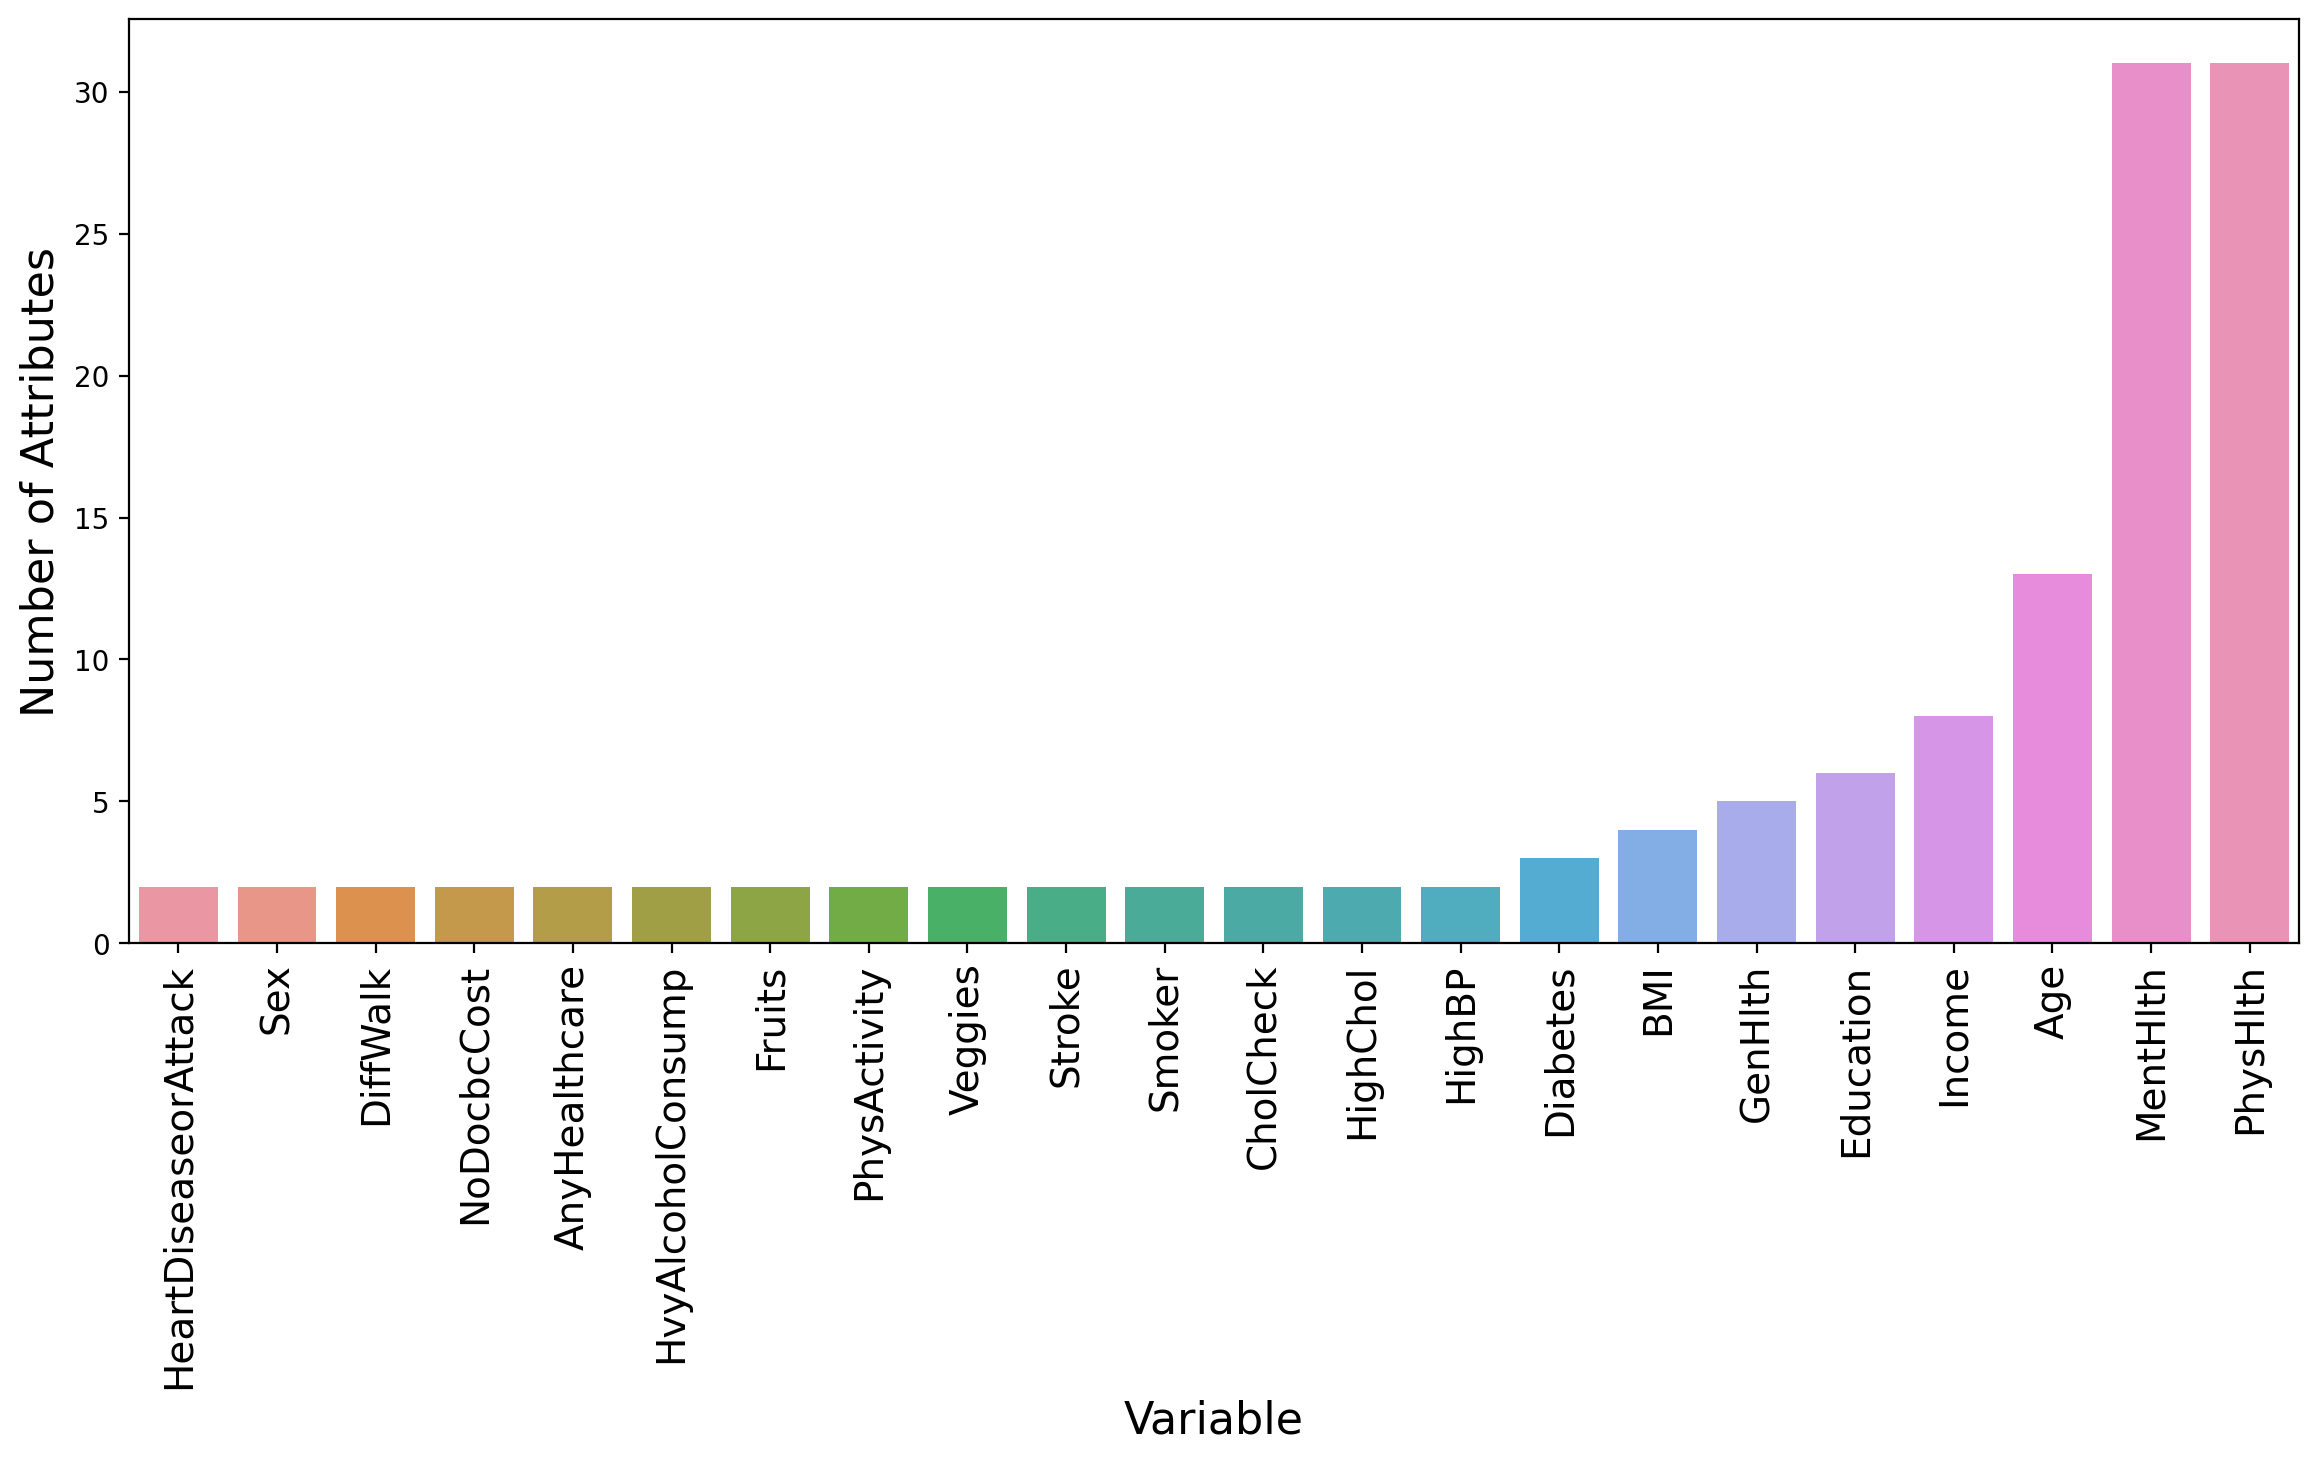

In [ ]:
'''Gets Plot of the categorial attributes '''
unique_vals = df.nunique().sort_values(ascending=True)
plt.figure(figsize=(14, 6), dpi=200)
sns.barplot(x=unique_vals.index, y=unique_vals.values)
#plt.xticks(rotation=90)
plt.xticks(rotation=90, fontsize=14)
plt.xlabel('Variable', fontsize=16)
plt.xlabel('Variable')
plt.ylabel('Number of Attributes', fontsize=16)
plt.show()

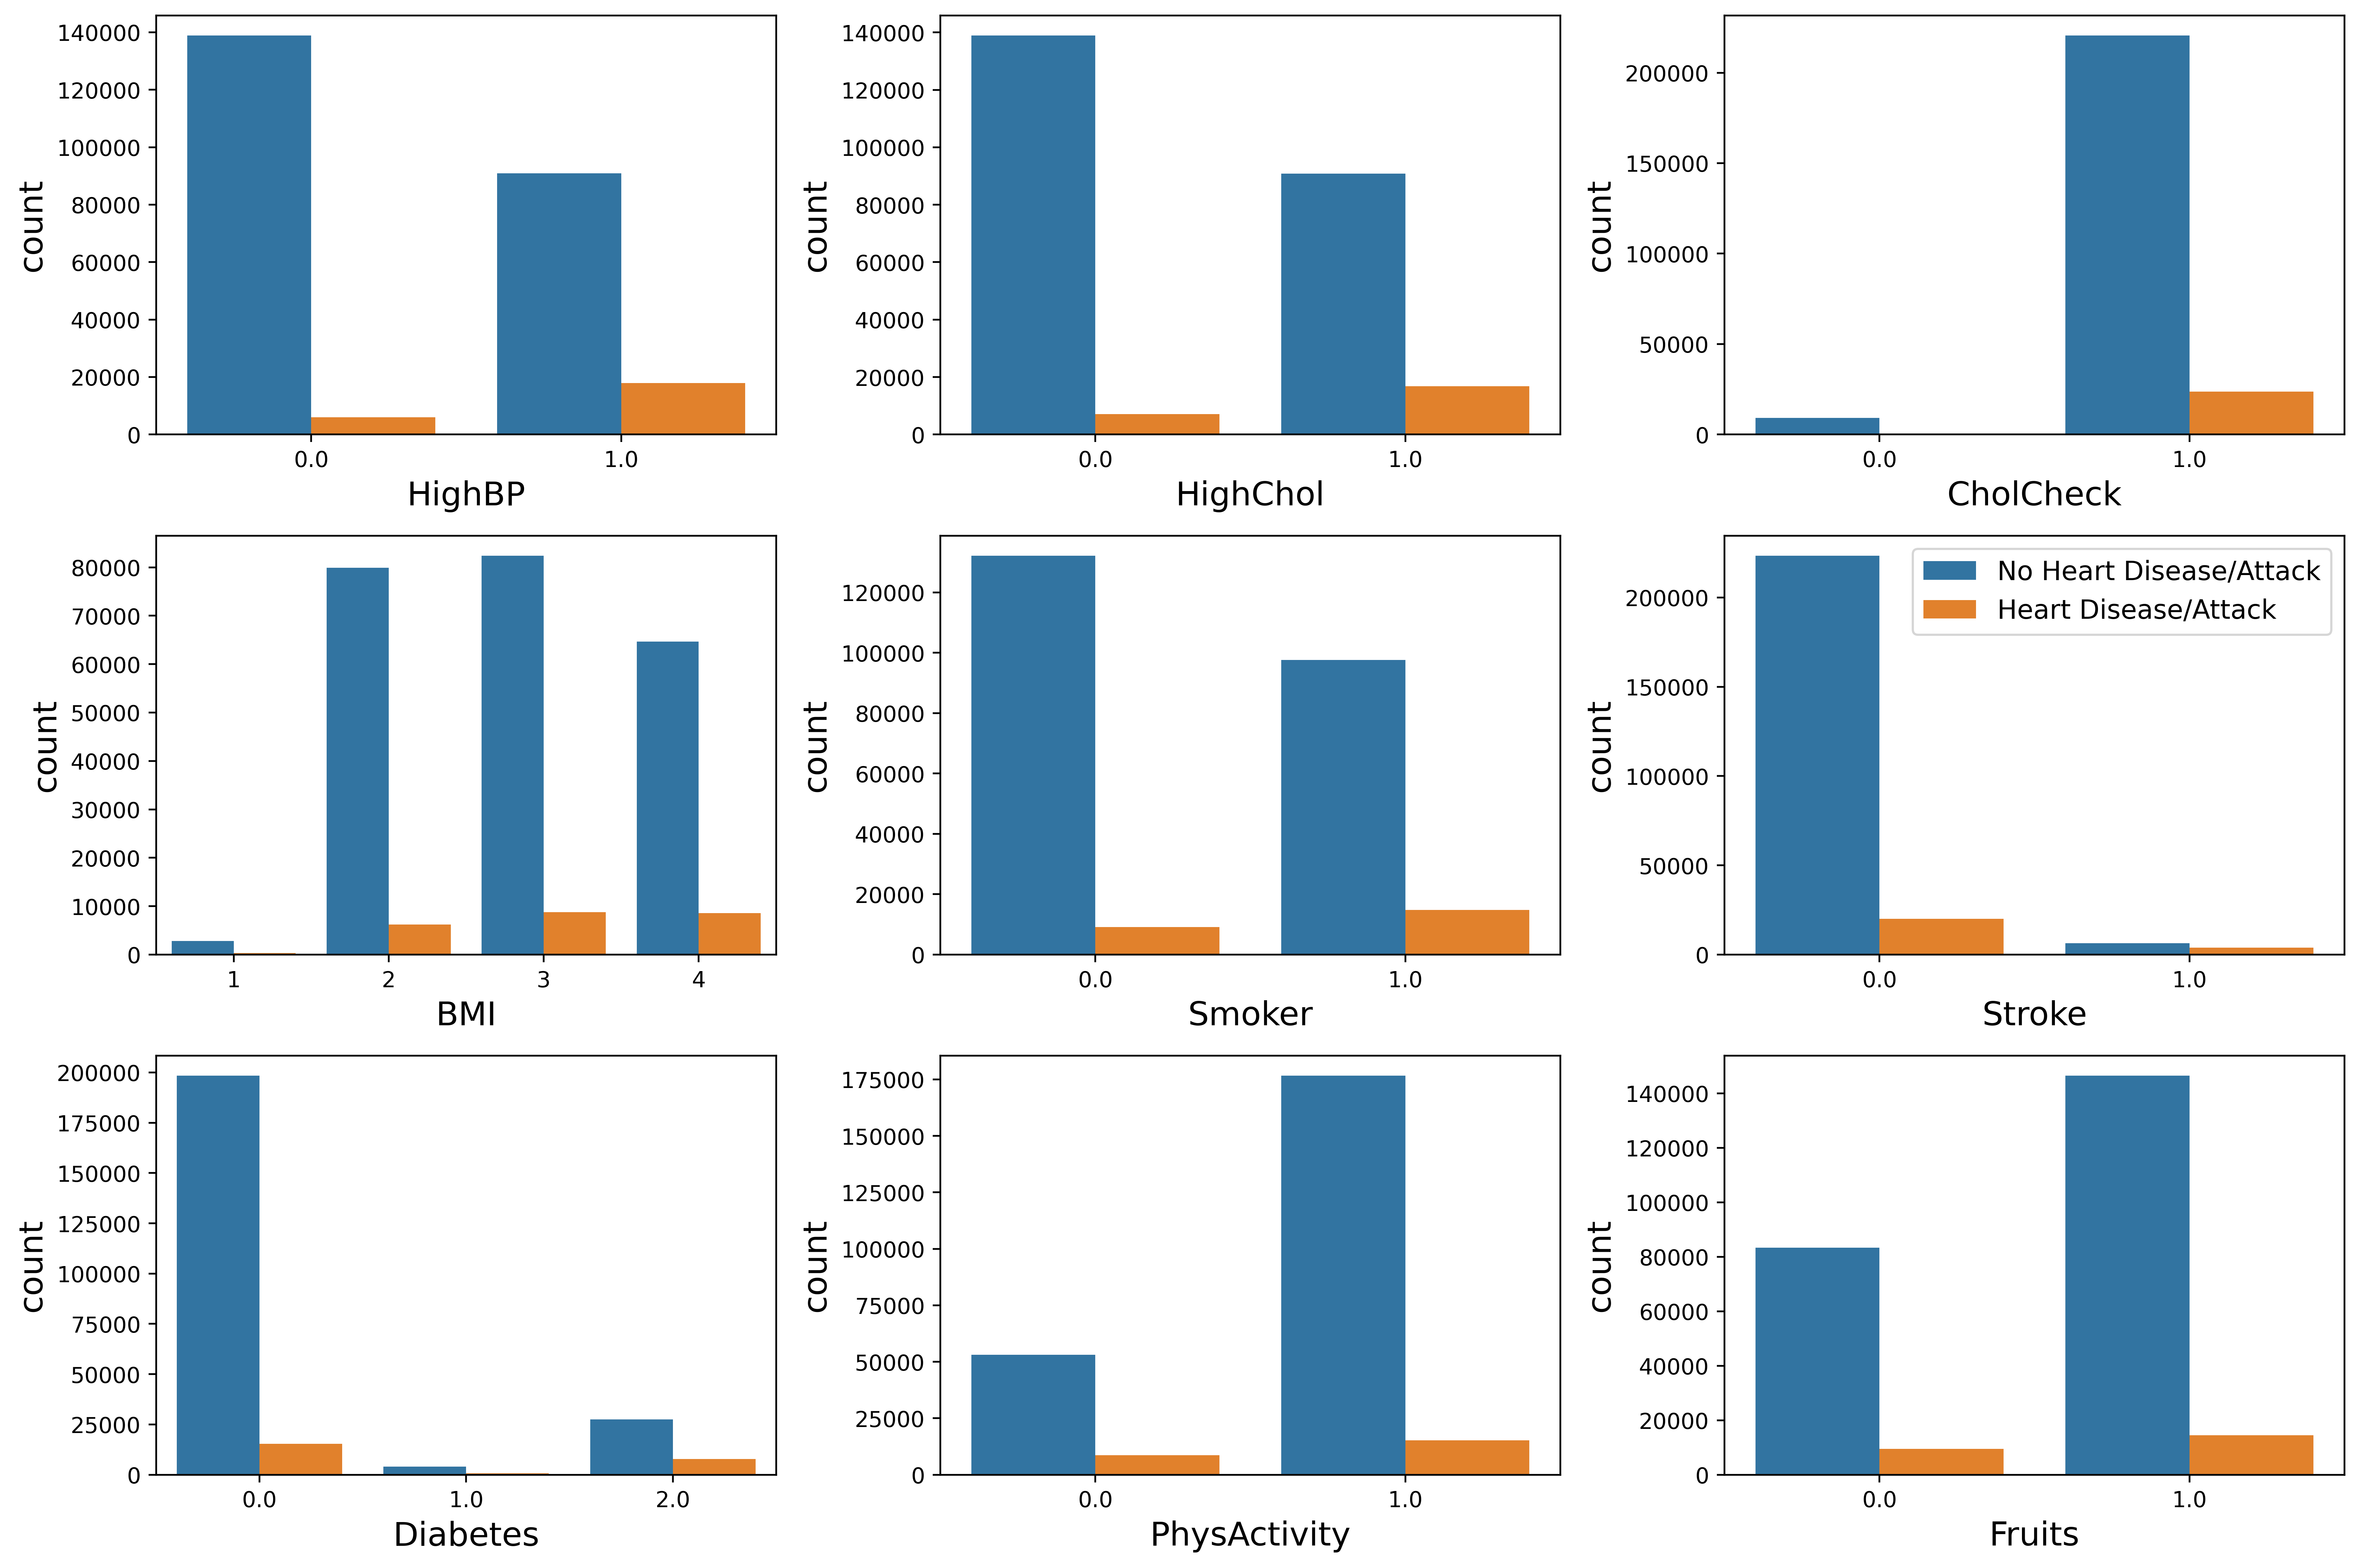

In [ ]:
'''Creates a grid Plot'''
col = df.columns[1:10]
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 10), dpi=500)


sns.countplot(x= col[0], data=df, hue='HeartDiseaseorAttack', ax=axes[0, 0])
sns.countplot(x=col[1], data=df, hue='HeartDiseaseorAttack', ax=axes[0, 1])
sns.countplot(x=col[2], data=df, hue='HeartDiseaseorAttack', ax=axes[0, 2])
sns.countplot(x=col[3], data=df, hue='HeartDiseaseorAttack', ax=axes[1, 0])
sns.countplot(x=col[4], data=df, hue='HeartDiseaseorAttack', ax=axes[1, 1])
sns.countplot(x=col[5], data=df, hue='HeartDiseaseorAttack', ax=axes[1, 2])
sns.countplot(x=col[6], data=df, hue='HeartDiseaseorAttack', ax=axes[2, 0])
sns.countplot(x=col[7], data=df, hue='HeartDiseaseorAttack', ax=axes[2, 1])
sns.countplot(x=col[8], data=df, hue='HeartDiseaseorAttack', ax=axes[2, 2])

axes[0, 0].legend().remove()
axes[0, 1].legend().remove()
axes[0, 2].legend().remove()
axes[1, 0].legend().remove()
axes[1, 1].legend().remove()
#axes[1, 2].legend().remove()
axes[2, 0].legend().remove()
axes[2, 1].legend().remove()
axes[2, 2].legend().remove()
l = ['No Heart Disease/Attack', 'Heart Disease/Attack']
axes[1, 2].legend(labels=l, fontsize=12)
for ax in axes.flat:
    ax.set_xlabel(ax.get_xlabel(), fontsize=15)
    ax.set_ylabel(ax.get_ylabel(), fontsize=15)
    
fig.tight_layout()
#plt.legend(loc=(1.05, 1.5), labels={'No Heart Disease/Attack', 'Heart Disease/Attack'})
plt.show()

In [ ]:
'''Creates a grid Plot'''
df2 = df.drop(['PhysHlth', 'MentHlth'], axis=1)
col = df2.columns[10:19]
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 10), dpi=1000)


sns.countplot(x= col[0], data=df, hue='HeartDiseaseorAttack', ax=axes[0, 0])
sns.countplot(x=col[1], data=df, hue='HeartDiseaseorAttack', ax=axes[0, 1])
sns.countplot(x=col[2], data=df, hue='HeartDiseaseorAttack', ax=axes[0, 2])
sns.countplot(x=col[3], data=df, hue='HeartDiseaseorAttack', ax=axes[1, 0])
sns.countplot(x=col[4], data=df, hue='HeartDiseaseorAttack', ax=axes[1, 1])
sns.countplot(x=col[5], data=df, hue='HeartDiseaseorAttack', ax=axes[1, 2])
sns.countplot(x=col[6], data=df, hue='HeartDiseaseorAttack', ax=axes[2, 0])
sns.countplot(x=col[7], data=df, hue='HeartDiseaseorAttack', ax=axes[2, 1])
sns.countplot(x=col[8], data=df, hue='HeartDiseaseorAttack', ax=axes[2, 2])

axes[0, 0].legend().remove()
axes[0, 1].legend().remove()
axes[0, 2].legend().remove()
axes[1, 0].legend().remove()
axes[1, 1].legend().remove()
#axes[1, 2].legend().remove()
axes[2, 0].legend().remove()
axes[2, 1].legend().remove()
axes[2, 2].legend().remove()

l = ['No Heart Disease/Attack', 'Heart Disease/Attack']
axes[1, 2].legend(labels=l, fontsize=12)
for ax in axes.flat:
    ax.set_xlabel(ax.get_xlabel(), fontsize=15)
    ax.set_ylabel(ax.get_ylabel(), fontsize=15)
    
fig.tight_layout()
#plt.legend(loc=(1.05, 1.5), labels={'No Heart Disease/Attack', 'Heart Disease/Attack'})
#plt.legend(labels={'No Heart Disease/Attack', 'Heart Disease/Attack'})
plt.show()

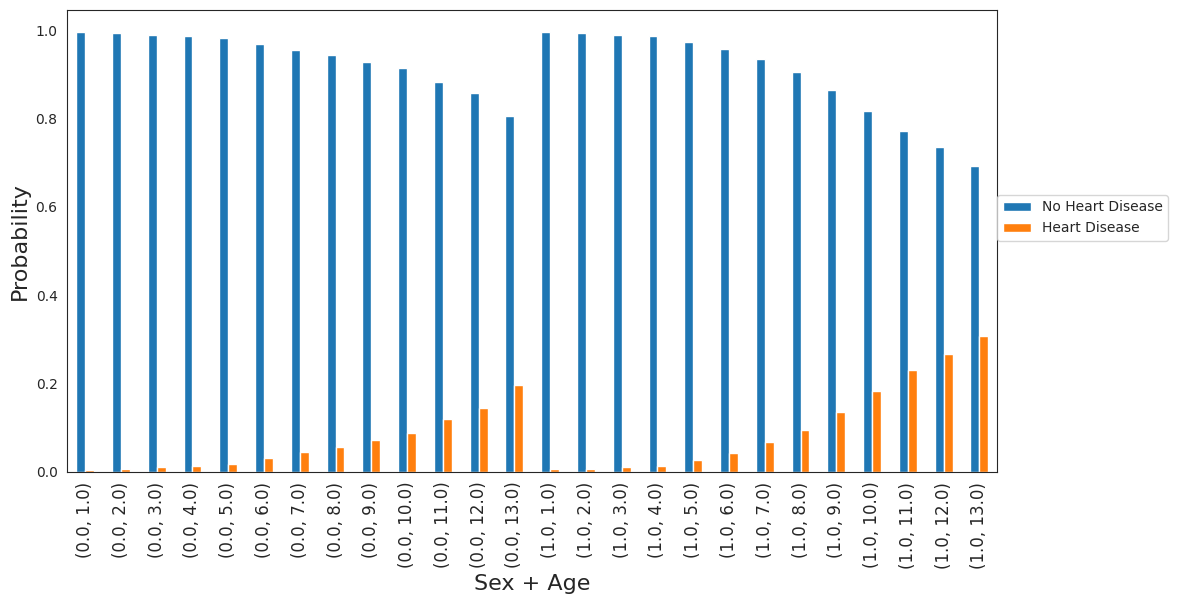

In [ ]:
'''Creates Plot of the Probabilities''' 
ct = pd.crosstab(index=[df['Sex'], df['Age']], columns=df["HeartDiseaseorAttack"],normalize="index")
sns.set_style("white")

fig, ax = plt.subplots(figsize=(12, 6))

label = ['No Heart Disease', 'Heart Disease']

ct.plot(kind='bar', ax=ax, stacked=False)

plt.legend(loc=(1.0,0.5), labels=label)


plt.xticks(fontsize=12)
plt.xlabel('Sex + Age', fontsize=16)

plt.ylabel('Probability', fontsize=16)
plt.show()

In [ ]:
def CE_HD(var):
    tab1 = pd.crosstab(df[var],df["HeartDiseaseorAttack"], margins = True)
    tab1_r = pd.crosstab(df[var],df["HeartDiseaseorAttack"], normalize = "index", margins = True)
    
    eHD = -1*(tab1_r.iloc[-1,0]*np.log(tab1_r.iloc[-1,0]) + tab1_r.iloc[-1,1]*np.log(tab1_r.iloc[-1,1]))
    
    temp = []
    P = []
    for i in range(tab1.shape[0] - 1):
        temp.append(-1*(tab1_r.iloc[i,0]*np.log(tab1_r.iloc[i,0]) + tab1_r.iloc[i,1]*np.log(tab1_r.iloc[i,1])))
        P.append(tab1.iloc[i,-1]/tab1.iloc[-1,-1])
    
    eVAR= sum(list(np.multiply(np.array(temp)[~np.isnan(temp)], np.array(P)[~np.isnan(temp)])))
    
    tab2 = pd.crosstab([df[var],df["Sex"], df["Age"]],df["HeartDiseaseorAttack"], margins = True)
    tab2_r = pd.crosstab([df[var],df["Sex"],df["Age"]],df["HeartDiseaseorAttack"], normalize = "index", margins = True)
    
    temp2 = []
    P2 = []
    for i in range(tab2.shape[0] - 1):
        temp2.append(-1*(tab2_r.iloc[i,0]*np.log(tab2_r.iloc[i,0]) + tab2_r.iloc[i,1]*np.log(tab2_r.iloc[i,1])))
        P2.append(tab2.iloc[i,-1]/tab2.iloc[-1,-1])
        
    eVARSA = sum(list(np.multiply(np.array(temp2)[~np.isnan(temp2)], np.array(P2)[~np.isnan(temp2)])))
    
    return(eHD, eVAR, eVARSA)
    

In [ ]:
def CE_HDBP(var):
    tab1 = pd.crosstab(df[var],[df["HeartDiseaseorAttack"],df["HighBP"]], margins = True)
    tab1_r = pd.crosstab(df[var],[df["HeartDiseaseorAttack"],df["HighBP"]], normalize = "index", margins = True)
    
    eHD = -1*(tab1_r.iloc[-1,0]*np.log(tab1_r.iloc[-1,0]) + tab1_r.iloc[-1,1]*np.log(tab1_r.iloc[-1,1]) + tab1_r.iloc[-1,2]*np.log(tab1_r.iloc[-1,2]) + tab1_r.iloc[-1,3]*np.log(tab1_r.iloc[-1,3]))
    
    temp = []
    P = []
    for i in range(tab1.shape[0] - 1):
        temp.append(-1*(tab1_r.iloc[i,0]*np.log(tab1_r.iloc[i,0]) + tab1_r.iloc[i,1]*np.log(tab1_r.iloc[i,1]) + tab1_r.iloc[i,2]*np.log(tab1_r.iloc[i,2]) + tab1_r.iloc[i,3]*np.log(tab1_r.iloc[i,3])))
        P.append(tab1.iloc[i,-1]/tab1.iloc[-1,-1])
    
    eVAR= sum(list(np.multiply(np.array(temp)[~np.isnan(temp)], np.array(P)[~np.isnan(temp)])))
    
    tab2 = pd.crosstab([df[var],df["Sex"], df["Age"]],[df["HeartDiseaseorAttack"],df["HighBP"]], margins = True)
    tab2_r = pd.crosstab([df[var],df["Sex"],df["Age"]],[df["HeartDiseaseorAttack"],df["HighBP"]], normalize = "index", margins = True)    
    
    temp2 = []
    P2 = []
    for i in range(tab2.shape[0] - 1):
        temp2.append(-1*(tab2_r.iloc[i,0]*np.log(tab2_r.iloc[i,0]) + tab2_r.iloc[i,1]*np.log(tab2_r.iloc[i,1]) + tab2_r.iloc[i,2]*np.log(tab2_r.iloc[i,2]) + tab2_r.iloc[i,3]*np.log(tab2_r.iloc[i,3])))
        P2.append(tab2.iloc[i,-1]/tab2.iloc[-1,-1])       
        
    eVARSA = sum(list(np.multiply(np.array(temp2)[~np.isnan(temp2)], np.array(P2)[~np.isnan(temp2)])))
    
    return(eHD, eVAR, eVARSA)

In [ ]:
ce1 = []
ce2 = []
for i in df.columns:
    ce1.append(CE_HD(i)[1])
    ce2.append(CE_HDBP(i)[1])
    
a = pd.DataFrame(
    {'Variable': list(df.columns),
     'HD | var': ce1,
     'HD + BP | var': ce2
    })

a.sort_values(by=['HD | var'])

<ipython-input-11-4dd8a3592d02>:10: RuntimeWarning: divide by zero encountered in log
  temp.append(-1*(tab1_r.iloc[i,0]*np.log(tab1_r.iloc[i,0]) + tab1_r.iloc[i,1]*np.log(tab1_r.iloc[i,1])))
<ipython-input-11-4dd8a3592d02>:10: RuntimeWarning: invalid value encountered in double_scalars
  temp.append(-1*(tab1_r.iloc[i,0]*np.log(tab1_r.iloc[i,0]) + tab1_r.iloc[i,1]*np.log(tab1_r.iloc[i,1])))
<ipython-input-11-4dd8a3592d02>:21: RuntimeWarning: divide by zero encountered in log
  temp2.append(-1*(tab2_r.iloc[i,0]*np.log(tab2_r.iloc[i,0]) + tab2_r.iloc[i,1]*np.log(tab2_r.iloc[i,1])))
<ipython-input-11-4dd8a3592d02>:21: RuntimeWarning: invalid value encountered in double_scalars
  temp2.append(-1*(tab2_r.iloc[i,0]*np.log(tab2_r.iloc[i,0]) + tab2_r.iloc[i,1]*np.log(tab2_r.iloc[i,1])))
<ipython-input-12-09f715fad93d>:10: RuntimeWarning: divide by zero encountered in log
  temp.append(-1*(tab1_r.iloc[i,0]*np.log(tab1_r.iloc[i,0]) + tab1_r.iloc[i,1]*np.log(tab1_r.iloc[i,1]) + tab1_r.iloc[i,2]*n

Variable  HD | var  HD + BP | var
0   HeartDiseaseorAttack  0.000000       0.000000
14               GenHlth  0.279970       0.904106
19                   Age  0.283664       0.890922
1                 HighBP  0.289980       0.000000
17              DiffWalk  0.293992       0.936714
2               HighChol  0.295831       0.920298
16              PhysHlth  0.297741       0.948685
7               Diabetes  0.299066       0.929013
6                 Stroke  0.299094       0.955020
21                Income  0.301964       0.950711
5                 Smoker  0.305601       0.963511
20             Education  0.307281       0.960125
18                   Sex  0.308441       0.968536
8           PhysActivity  0.308593       0.963329
15              MentHlth  0.309818       0.968426
4                    BMI  0.310202       0.946115
3              CholCheck  0.310818       0.967115
10               Veggies  0.311388       0.970765
11     HvyAlcoholConsump  0.311642       0.972534
13           NoDocbcCost  0.311671       0.972501
9                 Fruits  0.311922       0.972117
12         AnyHealthcare  0.311926       0.972182

In [ ]:
a.sort_values(by = ["HD + BP | var"])

Variable  HD | var  HD + BP | var
0   HeartDiseaseorAttack  0.000000       0.000000
1                 HighBP  0.289980       0.000000
19                   Age  0.283664       0.890922
14               GenHlth  0.279970       0.904106
2               HighChol  0.295831       0.920298
7               Diabetes  0.299066       0.929013
17              DiffWalk  0.293992       0.936714
4                    BMI  0.310202       0.946115
16              PhysHlth  0.297741       0.948685
21                Income  0.301964       0.950711
6                 Stroke  0.299094       0.955020
20             Education  0.307281       0.960125
8           PhysActivity  0.308593       0.963329
5                 Smoker  0.305601       0.963511
3              CholCheck  0.310818       0.967115
15              MentHlth  0.309818       0.968426
18                   Sex  0.308441       0.968536
10               Veggies  0.311388       0.970765
9                 Fruits  0.311922       0.972117
12         AnyHealthcare  0.311926       0.972182
13           NoDocbcCost  0.311671       0.972501
11     HvyAlcoholConsump  0.311642       0.972534

In [ ]:
ce3 = []
ce4 = []
for i in df.columns:
    ce3.append(CE_HD(i)[2])
    ce4.append(CE_HDBP(i)[2])
    
b = pd.DataFrame(
    {'Variable': list(df.columns),
     'HD | var + sex + age': ce3,
     'HD + BP | var + sex + age': ce4
    })


<ipython-input-11-4dd8a3592d02>:10: RuntimeWarning: divide by zero encountered in log
  temp.append(-1*(tab1_r.iloc[i,0]*np.log(tab1_r.iloc[i,0]) + tab1_r.iloc[i,1]*np.log(tab1_r.iloc[i,1])))
<ipython-input-11-4dd8a3592d02>:10: RuntimeWarning: invalid value encountered in double_scalars
  temp.append(-1*(tab1_r.iloc[i,0]*np.log(tab1_r.iloc[i,0]) + tab1_r.iloc[i,1]*np.log(tab1_r.iloc[i,1])))
<ipython-input-11-4dd8a3592d02>:21: RuntimeWarning: divide by zero encountered in log
  temp2.append(-1*(tab2_r.iloc[i,0]*np.log(tab2_r.iloc[i,0]) + tab2_r.iloc[i,1]*np.log(tab2_r.iloc[i,1])))
<ipython-input-11-4dd8a3592d02>:21: RuntimeWarning: invalid value encountered in double_scalars
  temp2.append(-1*(tab2_r.iloc[i,0]*np.log(tab2_r.iloc[i,0]) + tab2_r.iloc[i,1]*np.log(tab2_r.iloc[i,1])))
<ipython-input-12-09f715fad93d>:10: RuntimeWarning: divide by zero encountered in log
  temp.append(-1*(tab1_r.iloc[i,0]*np.log(tab1_r.iloc[i,0]) + tab1_r.iloc[i,1]*np.log(tab1_r.iloc[i,1]) + tab1_r.iloc[i,2]*n

In [ ]:
b.sort_values(by = ["HD | var + sex + age"])

Variable  HD | var + sex + age  HD + BP | var + sex + age
0   HeartDiseaseorAttack              0.000000                   0.000000
14               GenHlth              0.250942                   0.811572
16              PhysHlth              0.263751                   0.836685
17              DiffWalk              0.264699                   0.854862
1                 HighBP              0.268064                   0.000000
6                 Stroke              0.268990                   0.870329
21                Income              0.269018                   0.852596
2               HighChol              0.270058                   0.851010
7               Diabetes              0.270701                   0.849125
15              MentHlth              0.271942                   0.847544
20             Education              0.274215                   0.867576
5                 Smoker              0.275078                   0.875947
4                    BMI              0.275728                   0.847340
8           PhysActivity              0.276055                   0.872550
13           NoDocbcCost              0.276181                   0.877258
10               Veggies              0.278191                   0.878724
9                 Fruits              0.278262                   0.879116
3              CholCheck              0.278286                   0.877861
11     HvyAlcoholConsump              0.278469                   0.879452
12         AnyHealthcare              0.278640                   0.882397
19                   Age              0.278894                   0.883032
18                   Sex              0.278894                   0.883032

In [ ]:
b.sort_values(by = ["HD + BP | var + sex + age"])

Variable  HD | var + sex + age  HD + BP | var + sex + age
0   HeartDiseaseorAttack              0.000000                   0.000000
1                 HighBP              0.268064                   0.000000
14               GenHlth              0.250942                   0.811572
16              PhysHlth              0.263751                   0.836685
4                    BMI              0.275728                   0.847340
15              MentHlth              0.271942                   0.847544
7               Diabetes              0.270701                   0.849125
2               HighChol              0.270058                   0.851010
21                Income              0.269018                   0.852596
17              DiffWalk              0.264699                   0.854862
20             Education              0.274215                   0.867576
6                 Stroke              0.268990                   0.870329
8           PhysActivity              0.276055                   0.872550
5                 Smoker              0.275078                   0.875947
13           NoDocbcCost              0.276181                   0.877258
3              CholCheck              0.278286                   0.877861
10               Veggies              0.278191                   0.878724
9                 Fruits              0.278262                   0.879116
11     HvyAlcoholConsump              0.278469                   0.879452
12         AnyHealthcare              0.278640                   0.882397
18                   Sex              0.278894                   0.883032
19                   Age              0.278894                   0.883032

In [ ]:
def cond_ent_HD(var):
    tab = pd.crosstab(df[var],df["HeartDiseaseorAttack"],margins = True)
    tab_r = pd.crosstab(df[var],df["HeartDiseaseorAttack"],normalize = "index",margins = True)
    hdrv = multinomial.rvs(tab.iloc[2,2], [tab_r.iloc[-1,:][0], tab_r.iloc[-1,:][1]],10000)
    eHDdist = []
    for i in hdrv:
        eHDdist.append(-1*(i[0]/sum(i)*np.log(i[0]/sum(i)) + i[1]/sum(i)*np.log(i[1]/sum(i)))) 
    
    vardist = []
    for i in range(tab.shape[0] - 1):
        rv = multinomial.rvs(tab.iloc[i,2], [tab.iloc[i,0]/tab.iloc[i,2], tab.iloc[i,1]/tab.iloc[i,2]],10000)
    
        for j in rv:
            vardist.append(-1*(j[0]/sum(j)*np.log(j[0]/sum(j)) + j[1]/sum(j)*np.log(j[1]/sum(j))))

    temp = pd.crosstab(df[var], df["HeartDiseaseorAttack"], normalize = "all", margins = True)
    prob = temp.iloc[:,2]
        
    evardist = []
    for i in range(10000):
        temp = vardist[i::10000]
        evardist.append(sum(list(np.multiply(np.array(temp)[~np.isnan(temp)], prob[:-1][~np.isnan(temp)]))))
        
        
    tab2 = pd.crosstab([df[var],df["Sex"],df["Age"]],df["HeartDiseaseorAttack"],margins = True)
    
    varSAdist = []
    for i in range(tab2.shape[0] - 1):
        rv = multinomial.rvs(tab2.iloc[i,2], [tab2.iloc[i,0]/tab2.iloc[i,2], tab2.iloc[i,1]/tab2.iloc[i,2]],10000)
    
        for j in rv:
            varSAdist.append(-1*(j[0]/sum(j)*np.log(j[0]/sum(j)) + j[1]/sum(j)*np.log(j[1]/sum(j))))

    temp = pd.crosstab([df[var],df["Sex"],df["Age"]], df["HeartDiseaseorAttack"], normalize = "all", margins = True)
    prob = temp.iloc[:,2]
        
    evarSAdist = []
    for i in range(10000):
        temp = varSAdist[i::10000]
        evarSAdist.append(sum(list(np.multiply(np.array(temp)[~np.isnan(temp)], prob[:-1][~np.isnan(temp)]))))
        
    return(eHDdist,evardist,evarSAdist)

In [ ]:
def cond_ent_HDBP(var):
    tab = pd.crosstab(df[var],[df["HeartDiseaseorAttack"],df["HighBP"]],margins = True)
    tab_r = pd.crosstab(df[var],[df["HeartDiseaseorAttack"],df["HighBP"]],normalize = "index",margins = True)
    hdbprv = multinomial.rvs(tab.iloc[2,4], [tab_r.iloc[-1,:][0], tab_r.iloc[-1,:][1], tab_r.iloc[-1,:][2], tab_r.iloc[-1,:][3]],10000)
    eHDBPdist = []
    for i in hdbprv:
        eHDBPdist.append(-1*(i[0]/sum(i)*np.log(i[0]/sum(i)) + i[1]/sum(i)*np.log(i[1]/sum(i)) + i[2]/sum(i)*np.log(i[2]/sum(i)) + i[3]/sum(i)*np.log(i[3]/sum(i))))
    
    vardist = []
    for i in range(tab.shape[0] - 1):
        rv = multinomial.rvs(tab.iloc[i,4], [tab.iloc[i,0]/tab.iloc[i,4], tab.iloc[i,1]/tab.iloc[i,4],tab.iloc[i,2]/tab.iloc[i,4], tab.iloc[i,3]/tab.iloc[i,4]],10000)
    
        for j in rv:
            vardist.append(-1*(j[0]/sum(j)*np.log(j[0]/sum(j)) + j[1]/sum(j)*np.log(j[1]/sum(j)) + j[2]/sum(j)*np.log(j[2]/sum(j)) + j[3]/sum(j)*np.log(j[3]/sum(j))))

    temp = pd.crosstab(df[var], [df["HeartDiseaseorAttack"],df["HighBP"]], normalize = "all", margins = True)
    prob = temp.iloc[:,4]
        
    evardist = []
    for i in range(10000):
        temp = vardist[i::10000]
        evardist.append(sum(list(np.multiply(np.array(temp)[~np.isnan(temp)], prob[:-1][~np.isnan(temp)]))))
        
        
    tab2 = pd.crosstab([df[var],df["Sex"],df["Age"]],[df["HeartDiseaseorAttack"],df["HighBP"]],margins = True)
    
    varSAdist = []
    for i in range(tab2.shape[0] - 1):
        rv = multinomial.rvs(tab2.iloc[i,4], [tab2.iloc[i,0]/tab2.iloc[i,4], tab2.iloc[i,1]/tab2.iloc[i,4],tab2.iloc[i,2]/tab2.iloc[i,4], tab2.iloc[i,3]/tab2.iloc[i,4]],10000)
    
        for j in rv:
            varSAdist.append(-1*(j[0]/sum(j)*np.log(j[0]/sum(j)) + j[1]/sum(j)*np.log(j[1]/sum(j)) + j[2]/sum(j)*np.log(j[2]/sum(j)) + j[3]/sum(j)*np.log(j[3]/sum(j))))

    temp = pd.crosstab([df[var],df["Sex"],df["Age"]], [df["HeartDiseaseorAttack"],df["HighBP"]], normalize = "all", margins = True)
    prob = temp.iloc[:,4]
        
    evarSAdist = []
    for i in range(10000):
        temp = varSAdist[i::10000]
        evarSAdist.append(sum(list(np.multiply(np.array(temp)[~np.isnan(temp)], prob[:-1][~np.isnan(temp)]))))
        
    return(eHDBPdist,evardist,evarSAdist)

<ipython-input-18-441542387369>:32: RuntimeWarning: divide by zero encountered in log
  varSAdist.append(-1*(j[0]/sum(j)*np.log(j[0]/sum(j)) + j[1]/sum(j)*np.log(j[1]/sum(j))))
<ipython-input-18-441542387369>:32: RuntimeWarning: invalid value encountered in double_scalars
  varSAdist.append(-1*(j[0]/sum(j)*np.log(j[0]/sum(j)) + j[1]/sum(j)*np.log(j[1]/sum(j))))


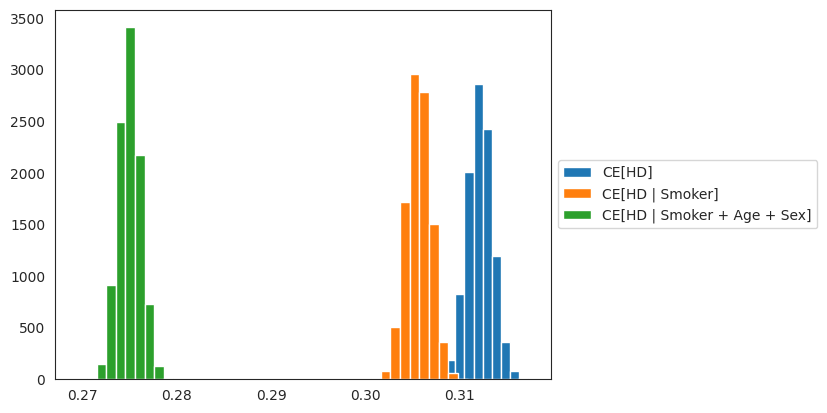

In [ ]:
a,b,c = cond_ent_HD("Smoker")
plt.hist(a)
plt.hist(b)
plt.hist(c)
plt.legend(["CE[HD]","CE[HD | Smoker]", "CE[HD | Smoker + Age + Sex]"],loc='center left', bbox_to_anchor=(1, 0.5))

<ipython-input-19-833d24c05e46>:32: RuntimeWarning: divide by zero encountered in log
  varSAdist.append(-1*(j[0]/sum(j)*np.log(j[0]/sum(j)) + j[1]/sum(j)*np.log(j[1]/sum(j)) + j[2]/sum(j)*np.log(j[2]/sum(j)) + j[3]/sum(j)*np.log(j[3]/sum(j))))
<ipython-input-19-833d24c05e46>:32: RuntimeWarning: invalid value encountered in double_scalars
  varSAdist.append(-1*(j[0]/sum(j)*np.log(j[0]/sum(j)) + j[1]/sum(j)*np.log(j[1]/sum(j)) + j[2]/sum(j)*np.log(j[2]/sum(j)) + j[3]/sum(j)*np.log(j[3]/sum(j))))


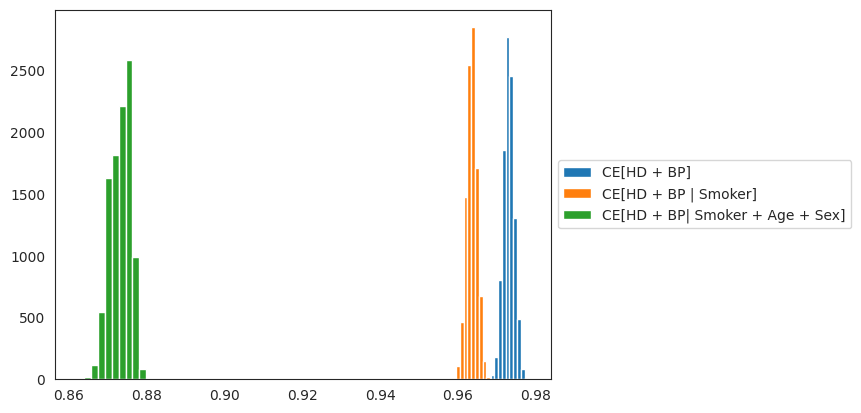

In [ ]:
a,b,c = cond_ent_HDBP("Smoker")
plt.hist(a)
plt.hist(b)
plt.hist(c)
plt.legend(["CE[HD + BP]","CE[HD + BP | Smoker]", "CE[HD + BP| Smoker + Age + Sex]"],loc='center left', bbox_to_anchor=(1, 0.5))

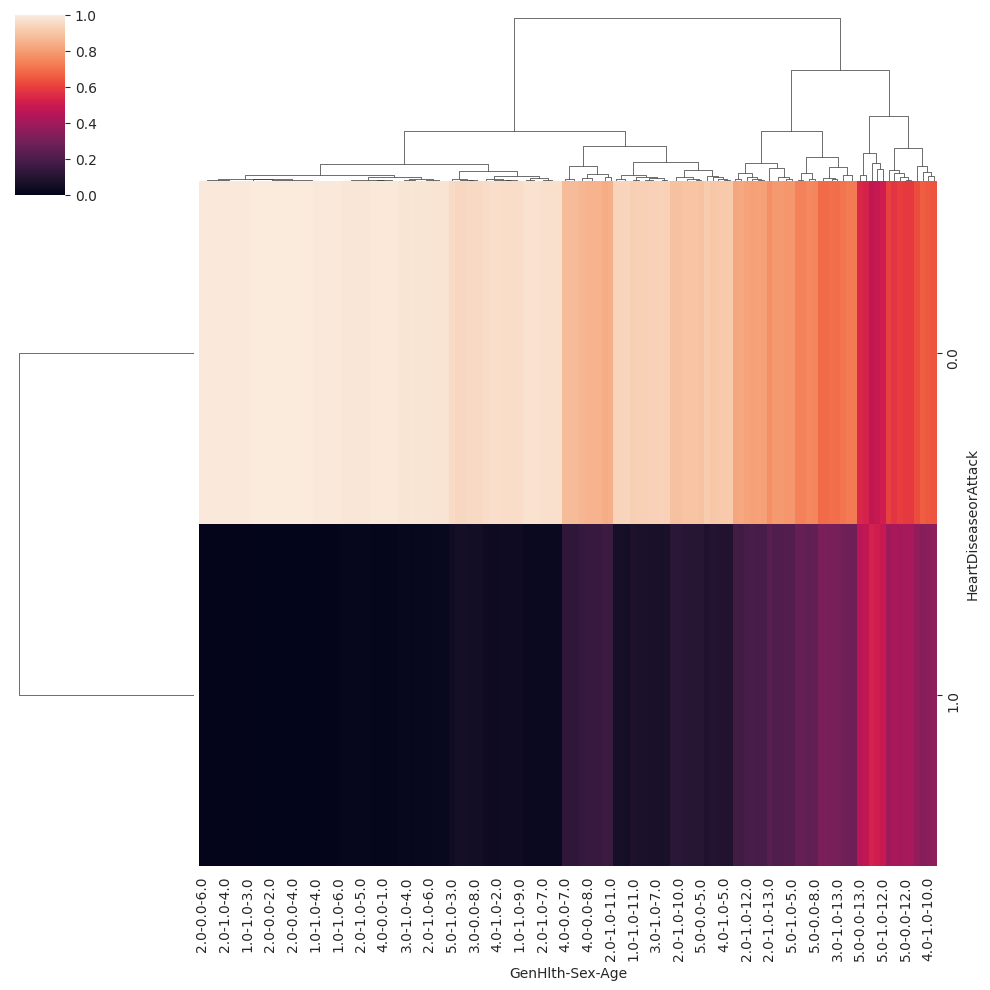

In [ ]:
sns.clustermap(pd.crosstab(df["HeartDiseaseorAttack"],[df["GenHlth"],df["Sex"],df["Age"]],normalize = "columns"))

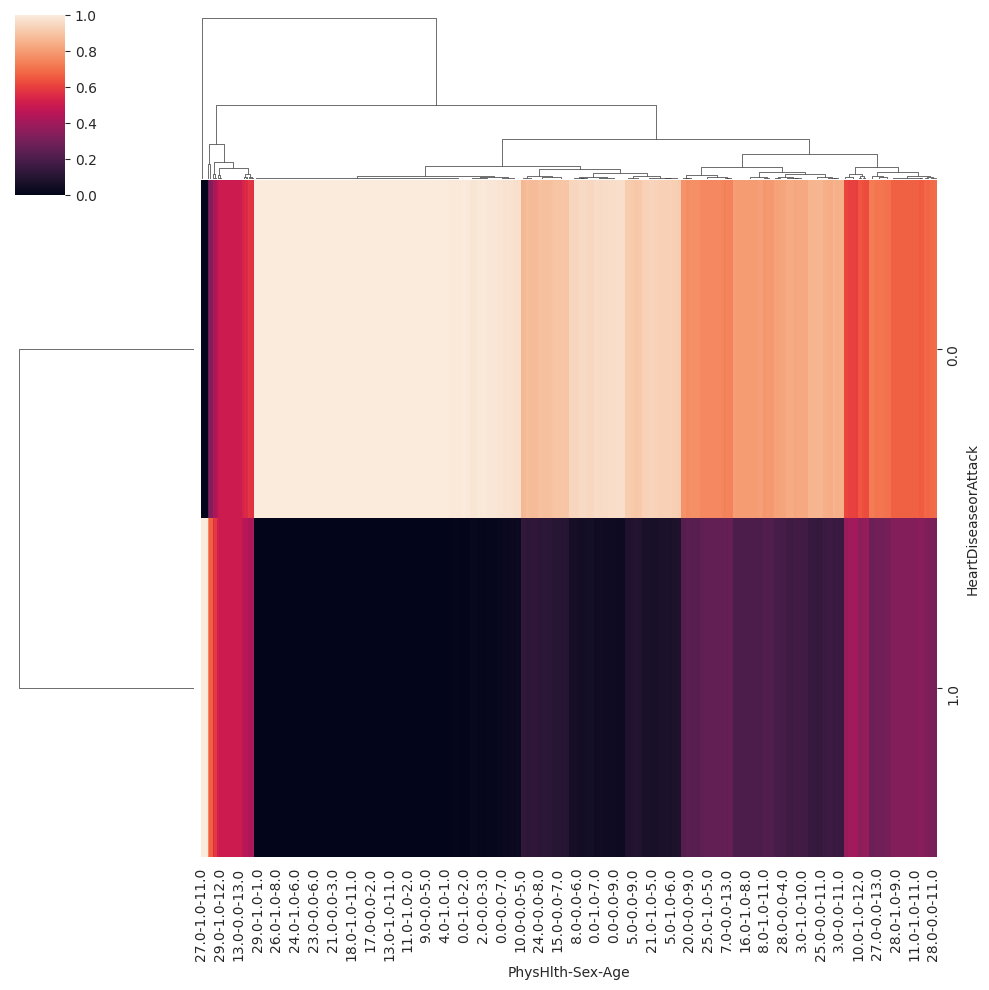

In [ ]:
sns.clustermap(pd.crosstab(df["HeartDiseaseorAttack"],[df["PhysHlth"],df["Sex"],df["Age"]],normalize = "columns"))

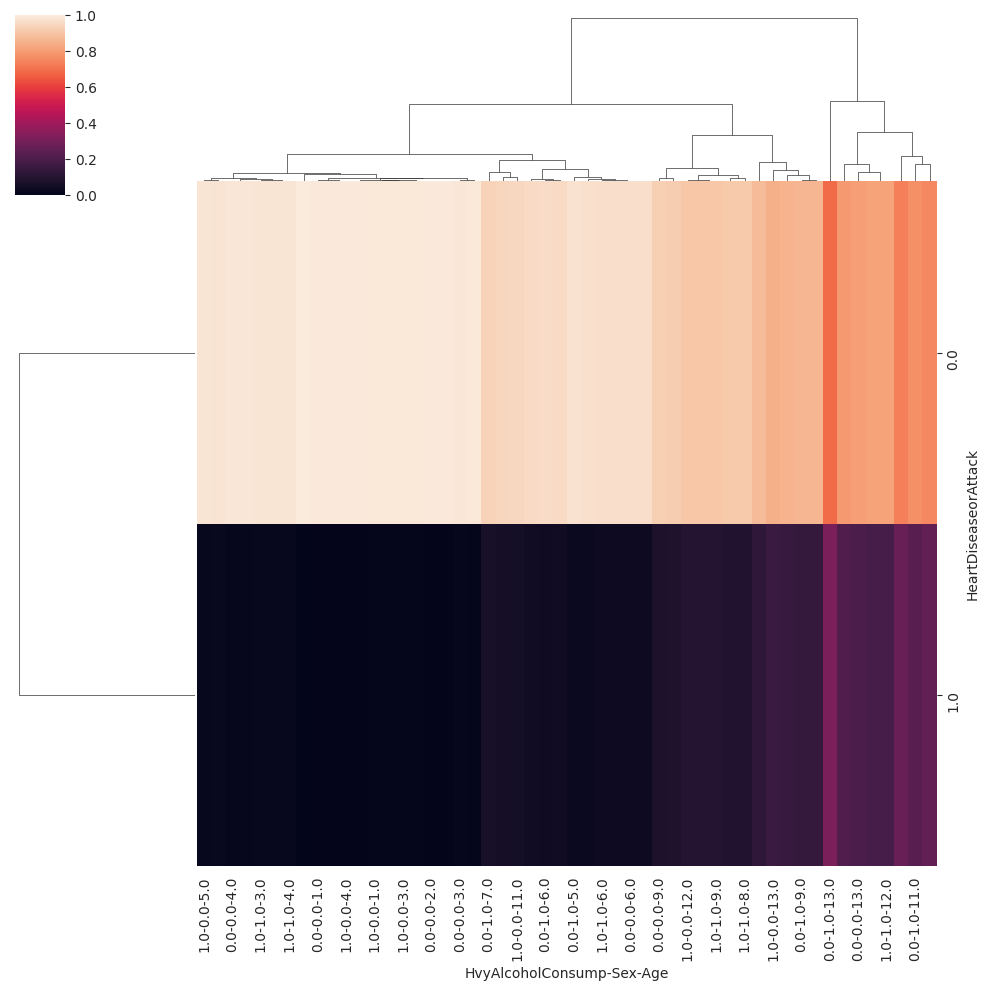

In [ ]:
sns.clustermap(pd.crosstab(df["HeartDiseaseorAttack"],[df["HvyAlcoholConsump"],df["Sex"],df["Age"]],normalize = "columns"))

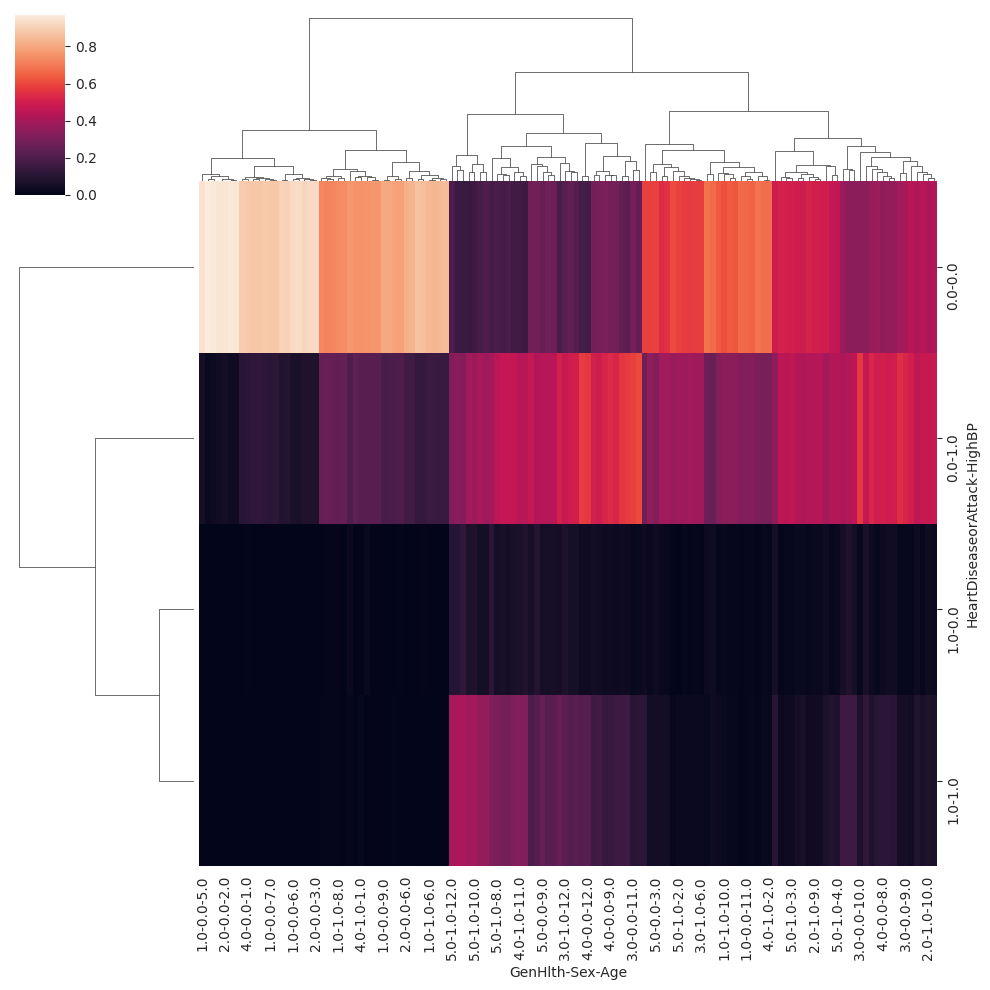

In [ ]:
sns.clustermap(pd.crosstab([df["HeartDiseaseorAttack"],df["HighBP"]],[df["GenHlth"],df["Sex"],df["Age"]],normalize = "columns"))

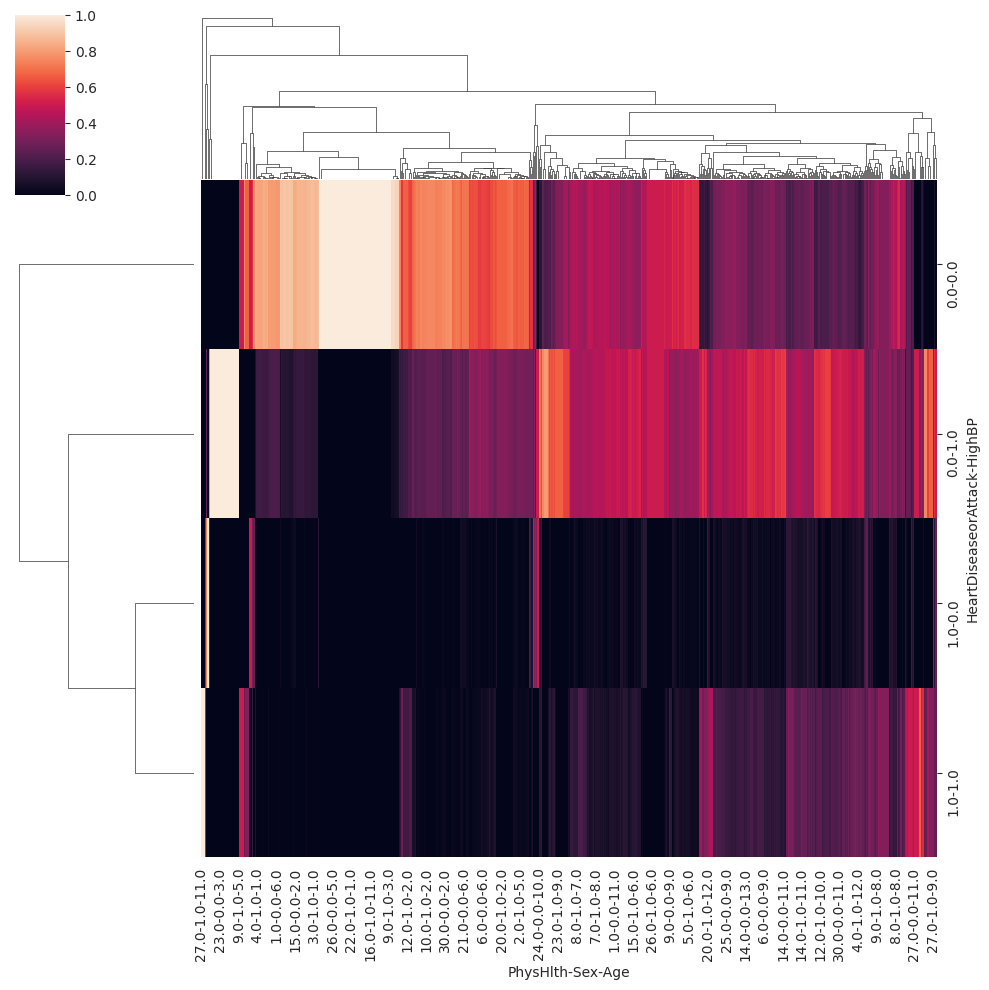

In [ ]:
sns.clustermap(pd.crosstab([df["HeartDiseaseorAttack"],df["HighBP"]],[df["PhysHlth"],df["Sex"],df["Age"]],normalize = "columns"))

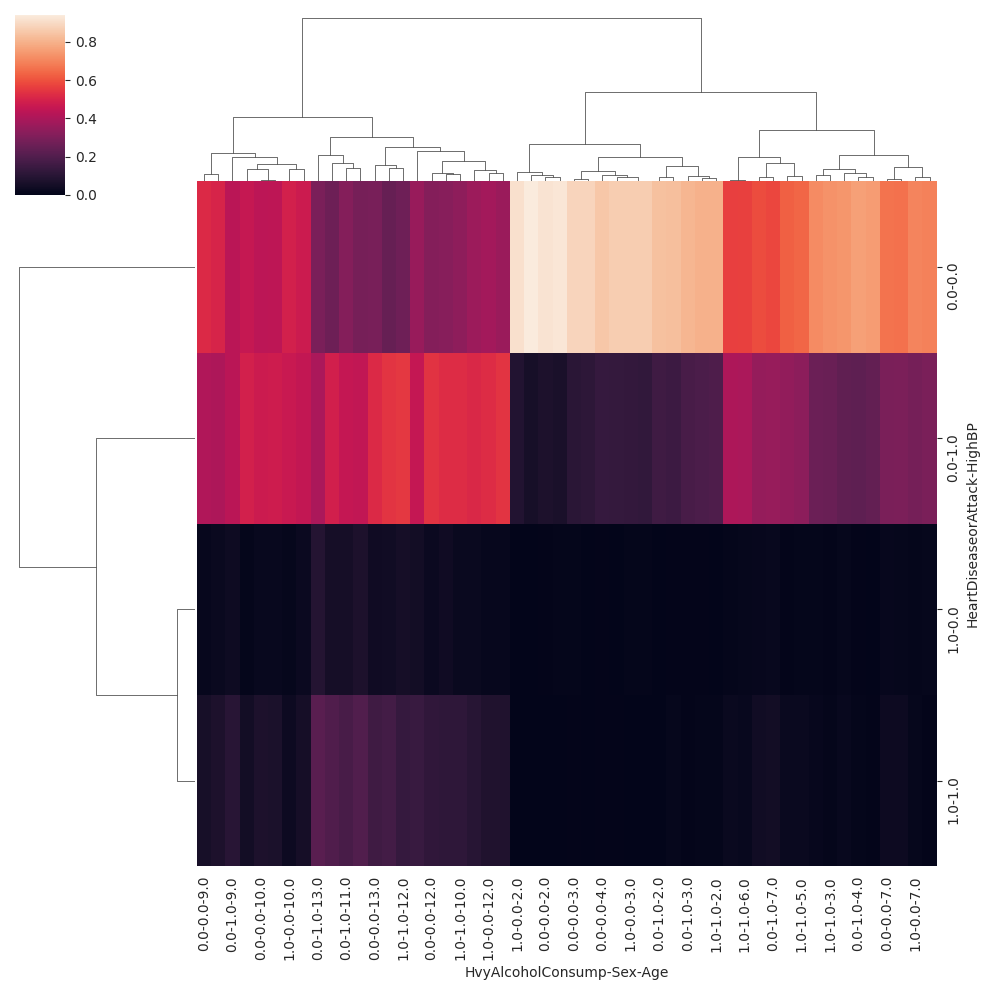

In [ ]:
sns.clustermap(pd.crosstab([df["HeartDiseaseorAttack"],df["HighBP"]],[df["HvyAlcoholConsump"],df["Sex"],df["Age"]],normalize = "columns"))

In [ ]:
sns.set(font_scale=1.2)
ct = crosstab_probabilities = pd.crosstab(index = [df["Sex"],df["Age"]], columns = df["HeartDiseaseorAttack"], normalize="index")
sns.set_style("white")

fig, ax = plt.subplots(figsize=(20, 12))

ct.plot(kind='bar', ax=ax, stacked=False)
plt.xlabel('Sex + Age')
plt.ylabel('Probability')
plt.legend(loc=(1,0.5), labels=['No Heart Disease' , 'Heart Disease'])
ct

ct = crosstab_probabilities = pd.crosstab(index = [df["Sex"],df["Age"],df["GenHlth"]], columns = df["HeartDiseaseorAttack"], normalize="index")
sns.set_style("white")

fig, ax = plt.subplots(figsize=(12, 6))

ct.plot(kind='bar', ax=ax, stacked=False)
plt.xlabel('Sex + Age')
plt.ylabel('Count')
plt.legend(loc=(1.05,0.5), labels=['No Heart Disease/Attack','Heart Disease/Attack'])
plt.title('Distribution of Heart Disease by Diabetes, Age, and Sex')

with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(crosstab_probabilities)